# Machine vision methods applied to image pre processing

Purpose: Create a data set containing only insect pictures collected from the experiment of Ong, 2022

Author: Gabriel R. Palma

## Loading packages

In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import math

## Loading dataset

In [2]:
train_dir = '../../input_data/DipteraDataset/train/'
test_dir = '../../input_data/DipteraDataset/test/'

In [3]:
train_chrysomya_images_names = np.array(os.listdir('../../input_data/DipteraDataset/train/Chrysomya/'))
train_chrysomya_images_names = train_chrysomya_images_names[train_chrysomya_images_names!='.DS_Store']
train_chrysomya_images_names = train_chrysomya_images_names[train_chrysomya_images_names!='.ipynb_checkpoints']

train_lucilia_images_names = np.array(os.listdir('../../input_data/DipteraDataset/train/Lucilia/'))
train_lucilia_images_names = train_lucilia_images_names[train_lucilia_images_names!='.DS_Store']
train_lucilia_images_names = train_lucilia_images_names[train_lucilia_images_names!='.ipynb_checkpoints']

train_rhiniinae_images_names = np.array(os.listdir('../../input_data/DipteraDataset/train/Rhiniinae/'))
train_rhiniinae_images_names = train_rhiniinae_images_names[train_rhiniinae_images_names!='.DS_Store']
train_rhiniinae_images_names = train_rhiniinae_images_names[train_rhiniinae_images_names!='.ipynb_checkpoints']

train_sarcophaga_images_names = np.array(os.listdir('../../input_data/DipteraDataset/train/Sarcophaga/'))
train_sarcophaga_images_names = train_sarcophaga_images_names[train_sarcophaga_images_names!='.DS_Store']
train_sarcophaga_images_names = train_sarcophaga_images_names[train_sarcophaga_images_names!='.ipynb_checkpoints']

train_stomorhina_images_names = np.array(os.listdir('../../input_data/DipteraDataset/train/Stomorhina/'))
train_stomorhina_images_names = train_stomorhina_images_names[train_stomorhina_images_names!='.DS_Store']
train_stomorhina_images_names = train_stomorhina_images_names[train_stomorhina_images_names!='.ipynb_checkpoints']

In [4]:
test_chrysomya_images_names = np.array(os.listdir('../../input_data/DipteraDataset/test/Chrysomya/'))
test_chrysomya_images_names = test_chrysomya_images_names[test_chrysomya_images_names!='.DS_Store']
test_chrysomya_images_names = test_chrysomya_images_names[test_chrysomya_images_names!='.ipynb_checkpoints']

test_lucilia_images_names = np.array(os.listdir('../../input_data/DipteraDataset/test/Lucilia/'))
test_lucilia_images_names = test_lucilia_images_names[test_lucilia_images_names!='.DS_Store']
test_lucilia_images_names = test_lucilia_images_names[test_lucilia_images_names!='.ipynb_checkpoints']

test_rhiniinae_images_names = np.array(os.listdir('../../input_data/DipteraDataset/test/Rhiniinae/'))
test_rhiniinae_images_names = test_rhiniinae_images_names[test_rhiniinae_images_names!='.DS_Store']
test_rhiniinae_images_names = test_rhiniinae_images_names[test_rhiniinae_images_names!='.ipynb_checkpoints']

test_sarcophaga_images_names = np.array(os.listdir('../../input_data/DipteraDataset/test/Sarcophaga/'))
test_sarcophaga_images_names = test_sarcophaga_images_names[test_sarcophaga_images_names!='.DS_Store']
test_sarcophaga_images_names = test_sarcophaga_images_names[test_sarcophaga_images_names!='.ipynb_checkpoints']

test_stomorhina_images_names = np.array(os.listdir('../../input_data/DipteraDataset/test/Stomorhina/'))
test_stomorhina_images_names = test_stomorhina_images_names[test_stomorhina_images_names!='.DS_Store']
test_stomorhina_images_names = test_stomorhina_images_names[test_stomorhina_images_names!='.ipynb_checkpoints']

## Functions used in this project

In [5]:
def get_vertical_line(img_path):
    ''' This function return the x and y values related to the needle of the image '''
    img = cv.imread(img_path)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    thrsholded_img = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,2)
    lines = cv.HoughLinesP(thrsholded_img,1,np.pi/360,100,minLineLength=80,maxLineGap=50)
    
    # Obtaining hough lines axis
    for line in lines:
        x1,y1,x2,y2 = line[0]
        break
        
    # Obtaning the m value for interporlation
    if x1 == x2:
        x1 = x1 + 1   
    m = (y2 - y1)/ (x2 - x1)        
    
    return(img, thrsholded_img, x1, y1, x2, y2, m)

def create_blob_detector(minThreshold = 10, 
                         maxThreshold = 200, 
                         filterByArea = True,
                         minArea = 150,
                         filterByCircularity = False,
                         minCircularity = 0.5, 
                         filterByConvexity = False, 
                         minConvexity = 0.87, 
                         filterByInertia = False, 
                         minInertiaRatio = 0.01):
    '''This function creates a blob detector given a number of parameters'''
    # Setup SimpleBlobDetector parameters.
    params = cv.SimpleBlobDetector_Params()

    # Change thresholds
    params.minThreshold = minThreshold;
    params.maxThreshold = maxThreshold;

    # Filter by Area.
    params.filterByArea = filterByArea
    params.minArea = minArea

    # Filter by Circularity
    params.filterByCircularity = filterByCircularity
    params.minCircularity = minCircularity

    # Filter by Convexity
    params.filterByConvexity = filterByConvexity
    params.minConvexity = minConvexity

    # Filter by Inertia
    params.filterByInertia = filterByInertia
    params.minInertiaRatio = minInertiaRatio
    
    detector = cv.SimpleBlobDetector_create(params)
    
    return(detector)
def dilate_and_erode_img(thrsholded_img, kernel_size, 
                         dilate_iterations,
                         erode_iterations):
    '''This function dilates and erode the thresholded image'''
    
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated_img = cv.dilate(thrsholded_img, kernel, iterations = dilate_iterations)
    eroded_img = cv.erode(dilated_img, kernel, iterations = erode_iterations)
    
    return(eroded_img)

def get_masks(eroded_img, 
              x1, y1, x2, 
              y2):
    '''This function finds the masks based on contours, centers of gravity and moments from an eroded image'''
    mask_insect = np.ones(224*224).reshape(224, 224)
    mask_needle = np.zeros(224*224).reshape(224, 224)
    
    # Obtain the countour of the eroded image
    contours, _ = cv.findContours(eroded_img, cv.RETR_LIST, cv.CHAIN_APPROX_NONE) 
    cog_n = 0
    max_area = 0
    for i, c in enumerate(contours):
        area = cv.contourArea(c) 
        if area > max_area:
            max_area = area
            index = i
            ic = c    
    # Find moments of the countour
    M = cv.moments(ic)
    if M['m00'] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])      
    # Finding the box of the contour
    countour_box = cv.boundingRect(ic)
    # Find the new center based on the center of gravity
    dx = 112 - cX
    dy = 112 - cY
        
    # Create the masks
    cv.fillPoly(mask_insect, pts = [ic], color = 0)
    cv.line(mask_needle,(int(x1), y1), (int(x2), y2), 1, 5)
    
    return(mask_insect, mask_needle, cX, cY, dx, dy, countour_box)

def remove_needle(mask_insect, mask_needle, img):
    '''This function use the created masks to remove the needles and interpolate to create an image including only the insect'''
    new_img = img
    mask = np.logical_and(mask_needle, mask_insect)
    for y in np.arange(0, 224, 1):    
        start = 0
        end = 0
        fs, fe = (True, True)

        for x in np.arange(1, 223):
            if mask[y, x] == True and mask[y, x - 1] == False and fs:
                start = x
                fs = False
            if mask[y, x] == False and mask[y, x - 1] == True and fe and fs == False:
                end = x
                fe = False


        if start != end:
            for point in np.arange(start, end, 1):            
                pl = new_img[y, start - 5, :]
                pr = new_img[y, end + 5, :]            
                i = point - start  
                n = end - start
                p = (pl * ((n - i)/n)) + (pr * (i/n))
                new_img[y, point, :] = p
    return(new_img)

# 30 % test and 70 % train
def get_image_without_needle(base_dir, family_name, image_name):
    '''This function apply all the preprocessing techniques to obtain an image without needle'''
    img_path = base_dir + family_name + image_name
    img, thrsholded_img, x1, y1, x2, y2, m = get_vertical_line(img_path)
    detector = create_blob_detector()
    eroded_img = dilate_and_erode_img(thrsholded_img = thrsholded_img, kernel_size = 3, 
                                      dilate_iterations = 4,
                                      erode_iterations = 7)
    mask_insect, mask_needle, cX, cY, dx, dy, countour_box = get_masks(eroded_img, x1, y1, x2, y2)
    new_img = remove_needle(mask_insect, mask_needle, img)
    return(new_img, countour_box)
def create_non_needle_dataset(original_images_names, family_name, base_dir, new_dir):
    '''This function creates the new dataset without the needles'''
    images = []
    for i in range(len(original_images_names)):
        
        new_img, countour_box = get_image_without_needle(base_dir = base_dir, 
                                           family_name = family_name, 
                                           image_name = original_images_names[i])
        cv.imwrite(new_dir + family_name + original_images_names[i], new_img)
        
def create_centered_no_background_dataset(original_images_names, family_name, base_dir, new_dir):
    '''This function creates the new dataset without the needles'''
    images = []
    for i in range(len(original_images_names)):
        #print(new_dir + family_name + original_images_names[i])
        new_img, countour_box = get_image_without_needle(base_dir = base_dir, 
                                           family_name = family_name, 
                                           image_name = original_images_names[i])
        x, y, w, h = countour_box
        croped_img = new_img[y:(y+h), x:(x+w)]        
        nb_img = remove_background(croped_img, threshold = 180)
        centered_img = create_centered_img(nb_img, countour_box)
        
        cv.imwrite(new_dir + family_name + original_images_names[i], centered_img)
        
def create_dataset_for_segmentation(original_images_names, family_name, base_dir, new_dir, insectclass):
    '''This function creates the new dataset for image segmentation'''
    images = []
    for i in range(len(original_images_names)):
        
        new_img, countour_box = get_image_without_needle(base_dir = base_dir, 
                                           family_name = family_name, 
                                           image_name = original_images_names[i])
        x, y, w, h = countour_box        
        nb_img = create_segmentation_label(new_img, insectclass, threshold = 180)        
        
        cv.imwrite(new_dir + family_name + original_images_names[i], nb_img)
        
def remove_background(croped_img, threshold = 180):
    '''This function removes the background of a given image'''
    results_img = croped_img.copy()
    img_x, img_y = results_img.shape[0:2]
    
    for x in np.arange(0, img_x):
        for y in np.arange(0, img_y):            
            if np.any(results_img[x, y, :] > threshold):

                results_img[x, y, :] = 0
    return(results_img)

def create_segmentation_label(croped_img, insectclass, threshold = 180):
    '''This function removes the background of a given image'''
    results_img = croped_img.copy()
    img_x, img_y = results_img.shape[0:2]
    
    for x in np.arange(0, img_x):
        for y in np.arange(0, img_y):            
            if np.any(results_img[x, y, :] > threshold):

                results_img[x, y, :] = 1
                
    results_img = results_img[:, :, 0] + results_img[:, :, 1] + results_img[:, :, 2]
    results_img = results_img.reshape(img_x, img_y, 1)
    results_img[results_img == 3] = 2 # Using Cholet 2020 reccomendations
    results_img[results_img > 2] = insectclass
    
    return(results_img)


# def create_centered_img(no_background_img, countour_box):
#     '''This function centralise the detected insect based on the contours and box'''
#     x, y, w, h = countour_box
#     xq, yq = ((x+(x+w))/2, (y+(y+h))/2)

#     base_image = np.zeros(224*224*3).reshape(224, 224, 3).astype(np.uint16)
#     base_image[int(112 - (yq - y)):int(112+abs(yq - (y+h))), int(112 - (xq - x)):int(112+abs(xq - (x+w)))] = no_background_img
    
#     return(base_image)

def create_centered_img(no_background_img, countour_box):
    '''This function centralise the detected insect based on the contours and box'''
    x, y, w, h = countour_box
    xo, yo = (112, 112)
    x1 = x    
    x2 = x + w    
    y1 = y 
    y2 = y + h    
    x_bar = (x1 + x2)/2
    y_bar = (y1 + y2)/2
    dx1 = x_bar - x1
    dx2 = x2 - x_bar 
    dy1 = y_bar - y1
    dy2 = y2 - y_bar 
    x_new1 = xo  - dx1
    x_new2 = xo + dx2
    y_new1 = yo  - dy1
    y_new2 = yo + dy2   
    
    base_image = np.zeros(224*224*3).reshape(224, 224, 3).astype(np.uint16)
    
    base_image[int(y_new1):int(y_new2), int(x_new1):int(x_new2)] = no_background_img
    
    return(base_image)

In [6]:
img_path = train_dir + "Rhiniinae/" + '176.jpg'
img, thrsholded_img, x1, y1, x2, y2, m = get_vertical_line(img_path)
img2 = img.copy()

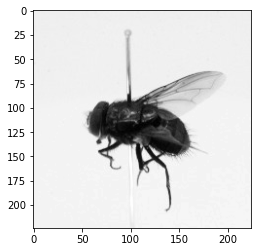

In [7]:
img = cv.imread(img_path)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')

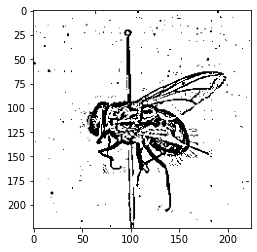

In [8]:
cv.line(img2,(int(x1), y1), (int(x2), y2), (180,151, 2), 2)
plt.imshow(thrsholded_img, cmap = 'Greys')

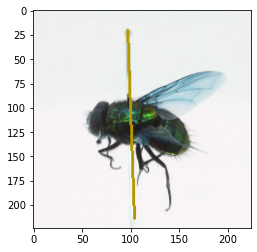

In [9]:
plt.imshow(img2)

In [10]:
detector = create_blob_detector()

In [11]:
eroded_img = dilate_and_erode_img(thrsholded_img = thrsholded_img, kernel_size = 3, 
                                  dilate_iterations = 4,
                                  erode_iterations = 7)

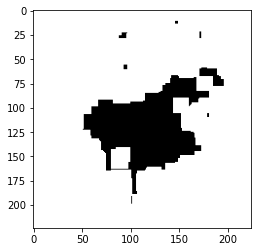

In [12]:
plt.imshow(eroded_img, cmap = 'Greys')

In [13]:
mask_insect, mask_needle, cX, cY, dx, dy, countour_box = get_masks(eroded_img, x1, y1, x2, y2)

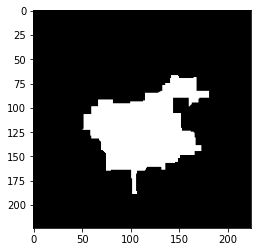

In [14]:
plt.imshow(mask_insect, cmap = 'Greys')

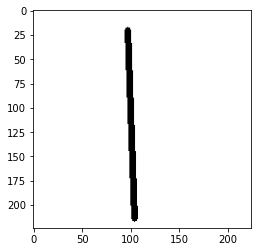

In [15]:
plt.imshow(mask_needle, cmap = 'Greys')

In [16]:
mask = np.logical_and(mask_needle, mask_insect)

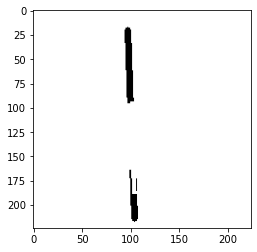

In [17]:
plt.imshow(mask, cmap = 'Greys')

In [18]:
new_img = remove_needle(mask_insect, mask_needle, img)

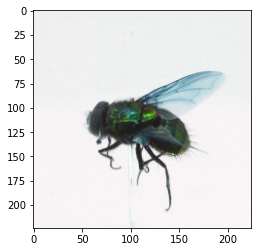

In [19]:
plt.imshow(new_img)

## Centering the image

In [8]:
train_chrysomya_images_names[100]

'370.jpg'

In [29]:
base_dir = '../../input_data/DipteraDataset/train/'
family_name = 'Chrysomya/'
new_img, countour_box = get_image_without_needle(base_dir = base_dir, 
                                           family_name = family_name, 
                                           image_name = '370.jpg')
x, y, w, h = countour_box
croped_img = new_img[y:(y+h), x:(x+w)]        
nb_img = remove_background(croped_img, threshold = 200)
centered_img = create_centered_img(nb_img, countour_box)

In [21]:
nb_img.shape

(204, 140, 3)

In [22]:
countour_box

(0, 20, 140, 204)

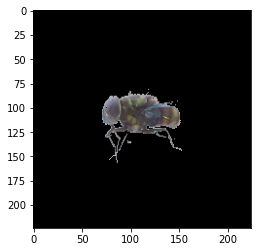

In [33]:
plt.imshow(centered_img, cmap = 'gray')

## Creating the new dataset withour needle

### Chrysomya

In [34]:
# Train data
create_non_needle_dataset(original_images_names = train_chrysomya_images_names, 
                          family_name = "Chrysomya/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/NoNeedleDipteraDataset/train/")
# Test data
create_non_needle_dataset(original_images_names = test_chrysomya_images_names, 
                          family_name = "Chrysomya/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/NoNeedleDipteraDataset/test/")


### Lucilia

In [35]:
# Train data
create_non_needle_dataset(original_images_names = train_lucilia_images_names, 
                          family_name = "Lucilia/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/NoNeedleDipteraDataset/train/")
# Test data
create_non_needle_dataset(original_images_names = test_lucilia_images_names, 
                          family_name = "Lucilia/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/NoNeedleDipteraDataset/test/")


### Rhiniinae

In [36]:
# Train data
create_non_needle_dataset(original_images_names = train_rhiniinae_images_names, 
                          family_name = "Rhiniinae/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/NoNeedleDipteraDataset/train/")
# Test data
create_non_needle_dataset(original_images_names = test_rhiniinae_images_names, 
                          family_name = "Rhiniinae/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/NoNeedleDipteraDataset/test/")

### Sarcophaga

In [37]:
# Train data
create_non_needle_dataset(original_images_names = train_sarcophaga_images_names, 
                          family_name = "Sarcophaga/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/NoNeedleDipteraDataset/train/")
# Test data
create_non_needle_dataset(original_images_names = test_sarcophaga_images_names, 
                          family_name = "Sarcophaga/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/NoNeedleDipteraDataset/test/")


### Stomorhina

In [38]:
# Train data
create_non_needle_dataset(original_images_names = train_stomorhina_images_names, 
                          family_name = "Stomorhina/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/NoNeedleDipteraDataset/train/")
# Test data
create_non_needle_dataset(original_images_names = test_stomorhina_images_names, 
                          family_name = "Stomorhina/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/NoNeedleDipteraDataset/test/")


# --------------------------------------------------------------------------------------------------

## No background and centered data

### Chrysomya

In [10]:
# Train data
create_centered_no_background_dataset(original_images_names = train_chrysomya_images_names, 
                          family_name = "Chrysomya/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/NoNeedleCenteredDipteraDataset/train/")
# Test data
create_centered_no_background_dataset(original_images_names = test_chrysomya_images_names, 
                          family_name = "Chrysomya/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/NoNeedleCenteredDipteraDataset/test/")


### Lucilia

In [11]:
# Train data
create_centered_no_background_dataset(original_images_names = train_lucilia_images_names, 
                          family_name = "Lucilia/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/NoNeedleCenteredDipteraDataset/train/")
# Test data
create_centered_no_background_dataset(original_images_names = test_lucilia_images_names, 
                          family_name = "Lucilia/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/NoNeedleCenteredDipteraDataset/test/")


### Rhiniinae

In [12]:
# Train data
create_centered_no_background_dataset(original_images_names = train_rhiniinae_images_names, 
                          family_name = "Rhiniinae/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/NoNeedleCenteredDipteraDataset/train/")
# Test data
create_centered_no_background_dataset(original_images_names = test_rhiniinae_images_names, 
                          family_name = "Rhiniinae/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/NoNeedleCenteredDipteraDataset/test/")

### Sarcophaga

In [13]:
# Train data
create_centered_no_background_dataset(original_images_names = train_sarcophaga_images_names, 
                          family_name = "Sarcophaga/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/NoNeedleCenteredDipteraDataset/train/")
# Test data
create_centered_no_background_dataset(original_images_names = test_sarcophaga_images_names, 
                          family_name = "Sarcophaga/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/NoNeedleCenteredDipteraDataset/test/")


### Stomorhina

In [14]:
# Train data
create_centered_no_background_dataset(original_images_names = train_stomorhina_images_names, 
                          family_name = "Stomorhina/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/NoNeedleCenteredDipteraDataset/train/")
# Test data
create_centered_no_background_dataset(original_images_names = test_stomorhina_images_names, 
                          family_name = "Stomorhina/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/NoNeedleCenteredDipteraDataset/test/")


# --------------------------------------------------------------------------------------------------

## U net dataset

### Chrysomya

In [24]:
# Train data
create_dataset_for_segmentation(original_images_names = train_chrysomya_images_names, 
                          family_name = "Chrysomya/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/unetData/train/", 
                          insectclass = 3)
# Test data
create_dataset_for_segmentation(original_images_names = test_chrysomya_images_names, 
                          family_name = "Chrysomya/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/unetData/test/", 
                          insectclass = 3)

### Lucilia

In [25]:
# Train data
create_dataset_for_segmentation(original_images_names = train_lucilia_images_names, 
                          family_name = "Lucilia/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/unetData/train/", 
                          insectclass = 4)
# Test data
create_dataset_for_segmentation(original_images_names = test_lucilia_images_names, 
                          family_name = "Lucilia/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/unetData/test/", 
                          insectclass = 4)


### Rhiniinae

In [26]:
# Train data
create_dataset_for_segmentation(original_images_names = train_rhiniinae_images_names, 
                          family_name = "Rhiniinae/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/unetData/train/", 
                          insectclass = 5)
# Test data
create_dataset_for_segmentation(original_images_names = test_rhiniinae_images_names, 
                          family_name = "Rhiniinae/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/unetData/test/", 
                          insectclass = 5)

### Sarcophaga

In [27]:
# Train data
create_dataset_for_segmentation(original_images_names = train_sarcophaga_images_names, 
                          family_name = "Sarcophaga/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/unetData/train/", 
                          insectclass = 6)
# Test data
create_dataset_for_segmentation(original_images_names = test_sarcophaga_images_names, 
                          family_name = "Sarcophaga/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/unetData/test/", 
                          insectclass = 6)


### Stomorhina

In [28]:
# Train data
create_dataset_for_segmentation(original_images_names = train_stomorhina_images_names, 
                          family_name = "Stomorhina/", 
                          base_dir = '../../input_data/DipteraDataset/train/',
                          new_dir = "../../input_data/unetData/train/", 
                          insectclass = 7)
# Test data
create_dataset_for_segmentation(original_images_names = test_stomorhina_images_names, 
                          family_name = "Stomorhina/", 
                          base_dir = '../../input_data/DipteraDataset/test/',
                          new_dir = "../../input_data/unetData/test/", 
                          insectclass = 7)


# --------------------------------------------------------------------------------------------------